# Código TP1: Generación de Datos y Ajuste de Modelos

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from typing import Tuple

# Ejercicio 1

## Ejercicio 1a (Diagonal)

In [223]:
def diagonal(d: int, C: float, n: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Genera sampleos de dos gausianas d-dimensionales en posición diagonal
    (una respecto a la otra), con dispersión C * sqrt(d).
    Cada sampleo posee n/2 puntos.

    Argumentos:
        d: número de dimensiones
        C: constante de ajuste de dispersión

    Retorna:
        X: matriz con d columnas y n filas de datos
        y: arreglo de n elementos con las clases correspondientes
            a cada fila de datos
    """
    mean0 = np.full(d, -1)
    mean1 = np.full(d, 1)

    desviacion_std = C * math.sqrt(d)
    covarianza = np.diag(np.full(d, desviacion_std)**2)

    input0 = np.random.multivariate_normal(mean0, covarianza, n//2) 
    input1 = np.random.multivariate_normal(mean1, covarianza, n//2) 

    output0 = np.full(n//2, 0)
    output1 = np.full(n//2, 1)

    X = np.concatenate([input0, input1])
    y = np.concatenate([output0, output1])

    #return pd.DataFrame({"x": inputs.tolist(), "y": outputs})
    return X, y

## Ejercicio 1b (Espirales)

In [224]:
def espirales(n: int) -> Tuple[np.ndarray, np.ndarray]:
    """ Generador de espirales """
    # Generar n puntos aleatorios dentro de un círculo de radio 1
    radius = np.random.uniform(0, 1, n)
    angle = np.random.uniform(0, 2 * np.pi, n)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)

    # Convertir las coordenadas x-y a coordenadas polares
    rho = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    # Asignar etiquetas de clase basadas en las coordenadas polares
    condition = (
        ((rho >= theta / (4 * np.pi)) & (rho <= (theta + np.pi) / (4 * np.pi))) |
        ((rho >= (theta + 2 * np.pi) / (4 * np.pi)) & (rho <= (theta + 3 * np.pi) / (4 * np.pi))) |
        ((rho >= (theta + 4 * np.pi) / (4 * np.pi)) & (rho <= (theta + 5 * np.pi) / (4 * np.pi)))
    )
    class_labels = np.where(condition, 0, 1)

    # Crear un dataframe con los inputs y outputs

    X = pd.DataFrame({'x': x, 'y': y})

    return X, class_labels

## Ejercicio 1c (N-Gausianas)

In [225]:
def ngausianas(d: int, medias: np.ndarray, desvios: np.ndarray, n: int) -> \
        Tuple[np.ndarray, np.ndarray]:
    """ Generador de gausianas """
    assert(medias.shape[0] == desvios.shape[0] ), \
        print('Medias y sds tienen distinto nro. de elementos.')
    assert(medias.shape[1] == d ), \
        print('Medias y dimensiones no coinciden.')

    X = np.empty((0, d))
    y = np.empty((0, 1))

    num_centres = medias.shape[0]

    for i in range(num_centres):
        mean = medias[i]
        desviacion_std = desvios[i]
        covarianza = np.diag(np.full(d, desviacion_std)**2)

        input0 = np.random.multivariate_normal(mean, covarianza, n//num_centres)  

        output0 = np.full((n//num_centres,1), i)

        X = np.vstack((X, input0))
        y = np.vstack((y, output0))
    
    return X, y

## Ejercicio 1d: Gráficos

In [226]:
# Generación de datos (útil también para testear las funciones)

diag1_X, diag1_y = diagonal(d=2, C=0.3, n=300)
diag2_X, diag2_y = diagonal(d=10, C=0.5, n=10000)

espirales1_X, espirales1_y = espirales(n=300)
espirales2_X, espirales2_y = espirales(n=10000)

# n-gaussianas
medias = np.array([[-2,-2],[4,0],[1.4,5],[-2,2]])
sds = np.array([1, 1, 0.5, 0.5])
ngausianas_X, ngausianas_y = ngausianas(d=2, medias=medias, desvios=sds, n=5000)


[]

<Figure size 640x480 with 0 Axes>

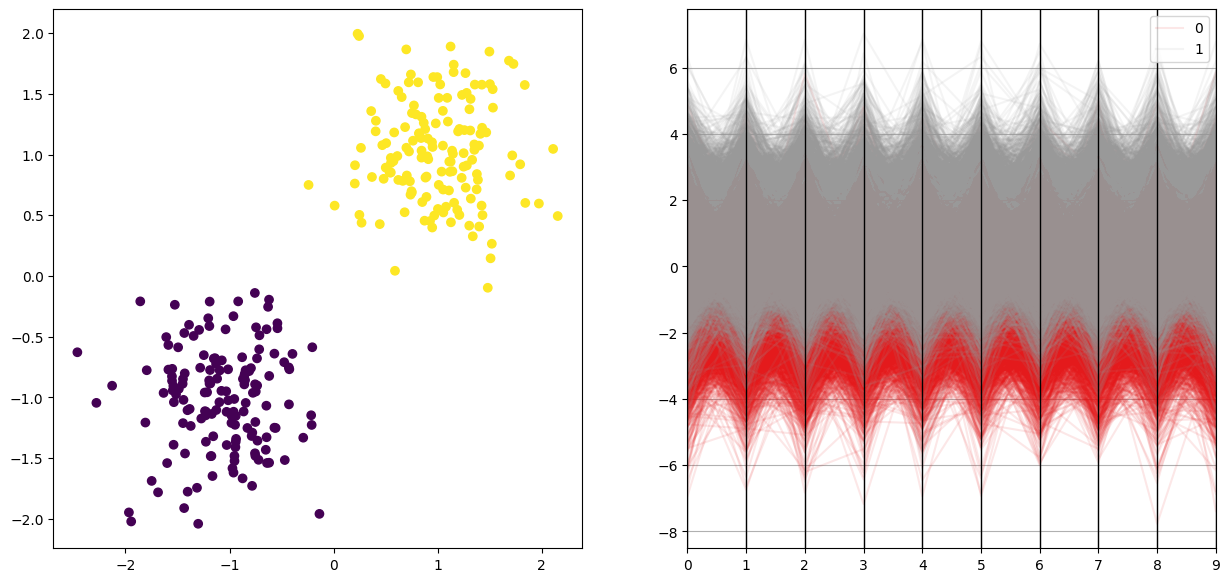

In [227]:
# Generación de gráficos
# Recomendamos generar una celda de código para cada gráfica, de forma de poder
# ejecutarlas indepentientemente

# Scatterplot para diagonal con d=2
fig = plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
x_coords, y_coords = zip(*diag1_X)
axes[0].scatter(x_coords, y_coords, c=diag1_y)

# Parallel plot para diagonal con d=n
df_diag2 = pd.DataFrame(diag2_X)
df_diag2['class'] = diag2_y.astype(str)  # Convertir clases a string para colores

pd.plotting.parallel_coordinates(df_diag2, 'class', colormap=plt.get_cmap("Set1"), alpha=0.1)

plt.plot()

<Figure size 800x800 with 0 Axes>

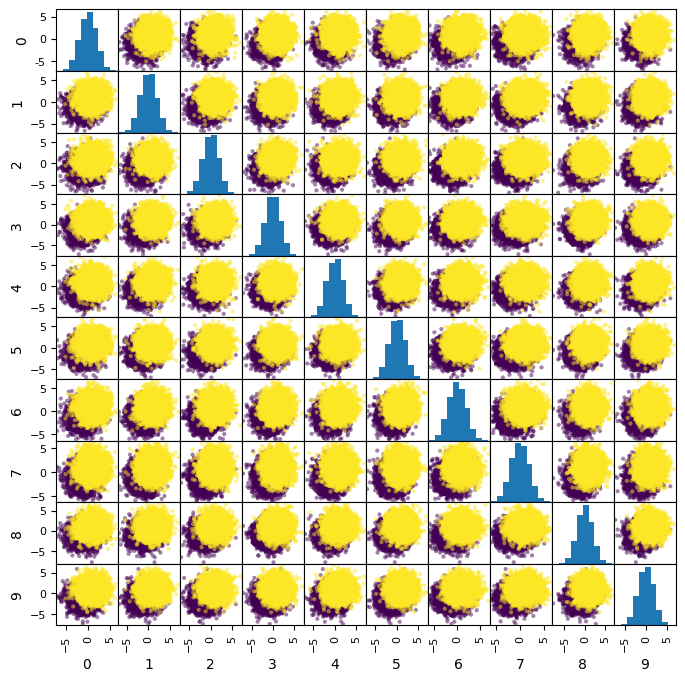

In [228]:
#extra scatter matrix
plt.figure(figsize=(8, 8))
pd.plotting.scatter_matrix(df_diag2, figsize=(8, 8), diagonal='hist',c = diag2_y)
plt.show()

[]

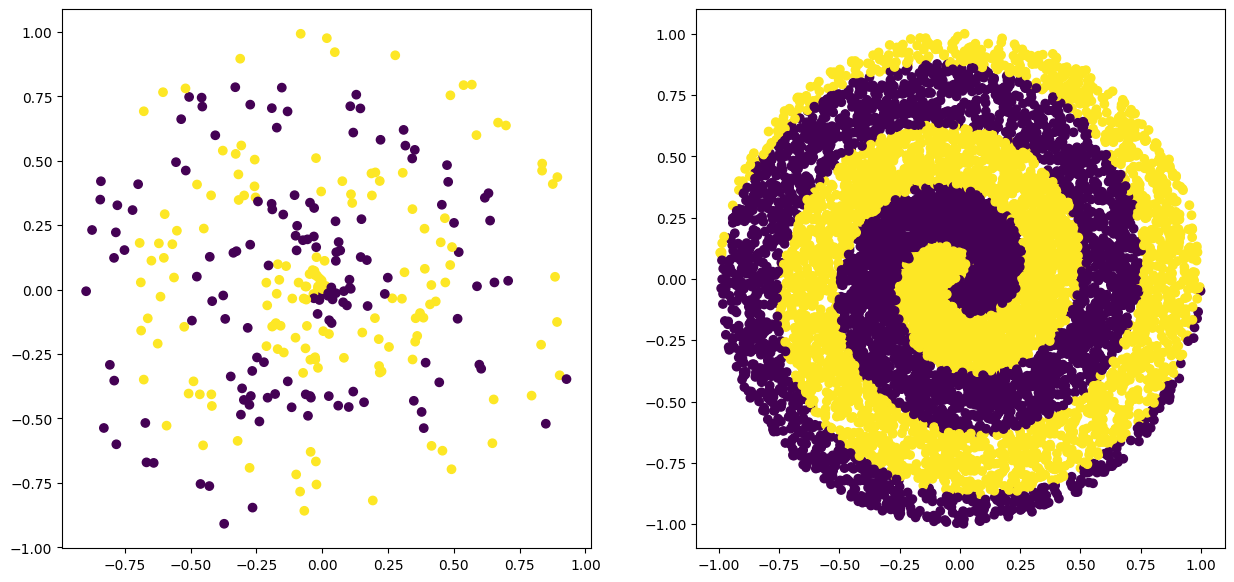

In [229]:

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(espirales1_X['x'], espirales1_X['y'], c=espirales1_y)
axes[1].scatter(espirales2_X['x'], espirales2_X['y'], c=espirales2_y)
plt.plot()

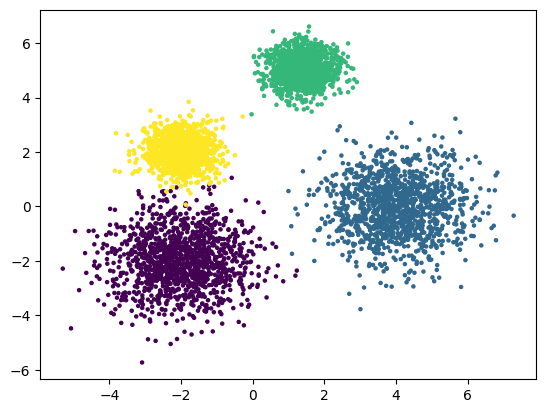

In [230]:
x_coords, y_coords = zip(*ngausianas_X)
plt.scatter(x_coords, y_coords, c=ngausianas_y, s=5)
plt.show()

# Ejercicio 2 (Ajuste de Modelos)

In [231]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [182]:
# TEST ERROR AVERAGE
# Diagonales
tree_test_error_diagonales_avg = 0
kn_test_error_diagonales_avg = 0

# Espirales
tree_test_error_espirales_avg = 0
kn_test_error_espirales_avg = 0

# n-gaussianas
tree_test_error_gaus_avg = 0
kn_test_error_gaus_avg = 0

# CROSS-VALIDATION ERROR AVERAGE
tree_cv_error_diagonales_avg = np.full((1,5), 0.0)
tree_cv_error_espirales_avg = np.full((1,5), 0.0)
tree_cv_error_gaus_avg = np.full((1,5), 0.0)
kn_cv_error_diagonales_avg = np.full((1,5), 0.0)
kn_cv_error_espirales_avg = np.full((1,5), 0.0)
kn_cv_error_gaus_avg = np.full((1,5), 0.0)

# n-gaussianas
medias = np.array([[-2,-2],[4,0],[1.4,5],[-2,2]])
sds = np.array([1, 1, 0.5, 0.5])

num_runs = 15
for _ in range(num_runs):
    diagTrain_X, diagTrain_y = diagonal(d=2, C=0.4, n=300)
    diagTest_X, diagTest_y = diagonal(d=2, C=0.4, n=10000)

    espiralesTrain_X, espiralesTrain_y = espirales(n=300)
    espiralesTrain_X = espiralesTrain_X.values
    espiralesTest_X, espiralesTest_y = espirales(n=10000)
    espiralesTest_X = espiralesTest_X.values

    ngausianasTrain_X, ngausianasTrain_y = ngausianas(d=2, medias=medias, desvios=sds, n=300)
    ngausianasTrain_y = ngausianasTrain_y.ravel()
    ngausianasTest_X, ngausianasTest_y = ngausianas(d=2, medias=medias, desvios=sds, n=10000)
    ngausianasTest_y = ngausianasTest_y.ravel()

    # Arboles de decisión
    tree_diagonales = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_diagonales.fit(diagTrain_X, diagTrain_y)
    tree_espirales = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_espirales.fit(espiralesTrain_X, espiralesTrain_y)
    tree_ngausianas = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_ngausianas.fit(ngausianasTrain_X, ngausianasTrain_y)

    tree_test_error_diagonales_avg += 1 - tree_diagonales.score(diagTest_X, diagTest_y)
    tree_test_error_espirales_avg += 1 - tree_espirales.score(espiralesTest_X, espiralesTest_y)
    tree_test_error_gaus_avg += 1 - tree_ngausianas.score(ngausianasTest_X, ngausianasTest_y)

    # KNN
    kn_diagonales = KNeighborsClassifier().fit(diagTrain_X, diagTrain_y)
    kn_espirales  = KNeighborsClassifier().fit(espiralesTrain_X, espiralesTrain_y)
    kn_ngausianas = KNeighborsClassifier().fit(ngausianasTrain_X, ngausianasTrain_y)

    kn_test_error_diagonales_avg += 1 - kn_diagonales.score(diagTest_X, diagTest_y)
    kn_test_error_espirales_avg += 1 - kn_espirales.score(espiralesTest_X, espiralesTest_y)
    kn_test_error_gaus_avg += 1 - kn_ngausianas.score(ngausianasTest_X, ngausianasTest_y)

    # Cross-validation
    tree_diagonales_cv = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_espirales_cv  = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    tree_ngausianas_cv = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

    tree_cv_error_diagonales_avg += np.full((1,5), 1) - cross_val_score(tree_diagonales_cv, diagTrain_X, diagTrain_y, cv=5)
    tree_cv_error_espirales_avg += np.full((1,5), 1) - cross_val_score(tree_espirales_cv, espiralesTrain_X, espiralesTrain_y, cv=5)
    tree_cv_error_gaus_avg += np.full((1,5), 1) - cross_val_score(tree_ngausianas_cv, ngausianasTrain_X, ngausianasTrain_y, cv=5)
    kn_cv_error_diagonales_avg += np.full((1,5), 1) - cross_val_score(KNeighborsClassifier(), diagTrain_X, diagTrain_y, cv=5)
    kn_cv_error_espirales_avg += np.full((1,5), 1) - cross_val_score(KNeighborsClassifier(), espiralesTrain_X, espiralesTrain_y, cv=5)
    kn_cv_error_gaus_avg += np.full((1,5), 1) - cross_val_score(KNeighborsClassifier(), ngausianasTrain_X, ngausianasTrain_y, cv=5)

# Redondear los resultados antes de imprimir
print(f"Test error árbol diagonales: {round(tree_test_error_diagonales_avg/num_runs, 4)}")
print("Error cv árbol diagonales:", np.round(tree_cv_error_diagonales_avg/num_runs, 4))
print("")
print(f"Test error knn diagonales: {round(kn_test_error_diagonales_avg/num_runs, 4)}")
print("Error cv knn diagonales:", np.round(kn_cv_error_diagonales_avg/num_runs, 4))
print("")
print(f"Test error árbol espirales: {round(tree_test_error_espirales_avg/num_runs, 4)}")
print("Error cv árbol espirales:", np.round(tree_cv_error_espirales_avg/num_runs, 4))
print("")
print(f"Test error knn espirales: {round(kn_test_error_espirales_avg/num_runs, 4)}")
print("Error cv knn espirales:", np.round(kn_cv_error_espirales_avg/num_runs, 4))
print("")
print(f"Test error árbol ngaus: {round(tree_test_error_gaus_avg/num_runs, 4)}")
print("Error cv árbol ngaus:", np.round(tree_cv_error_gaus_avg/num_runs, 4))
print("")
print(f"Test error knn ngaus: {round(kn_test_error_gaus_avg/num_runs, 4)}")
print("Error cv knn ngaus:", np.round(kn_cv_error_gaus_avg/num_runs, 4))

Test error árbol diagonales: 0.0213
Error cv árbol diagonales: [[0.02   0.0233 0.0178 0.0289 0.0178]]

Test error knn diagonales: 0.0077
Error cv knn diagonales: [[0.0044 0.0122 0.0033 0.01   0.0078]]

Test error árbol espirales: 0.2317
Error cv árbol espirales: [[0.2733 0.2644 0.2656 0.2444 0.26  ]]

Test error knn espirales: 0.1604
Error cv knn espirales: [[0.18   0.1856 0.1733 0.1722 0.18  ]]

Test error árbol ngaus: 0.0092
Error cv árbol ngaus: [[0.0089 0.0133 0.0089 0.0133 0.0111]]

Test error knn ngaus: 0.0035
Error cv knn ngaus: [[0.0011 0.0011 0.0044 0.0044 0.0033]]


De los resultados podemos observar que en general cross-validation estima razonablemente bien el error. Siendo que el conjunto de test es relativamente muy grande contra el de entrenamiento, podriamos considerar al error de test como el error real. Vemos que en general cross_val tiende a sobreestimar el error, pero se observa que entre los distintos folds hay una gran variacion del error, siempre dentro del orden del error real.   

No se observa alguna "afinidad" o un problema evidente para ninguno de los modelos ni para alguno de los tipos de datos.

Posibles pruebas futuras:
* Variar la dimensionalidad de los datos 
* Variar la cantidad de datos en el conjunto de entrenamiento
* Variar la dispersion de los datos diagonales y n-gausianos (aumentar ruido)

# Ejercicio 3 (Visualización)

In [232]:
import seaborn as sns  # visualización estilo matplotlib, trae datasets
import plotly as ply
from sklearn.datasets import load_iris  # clásico dataset de juguete
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
from plotly.graph_objects import Scatterpolar

# https://pypi.org/project/ChernoffFace/
#! pip install git+https://github.com/antononcube/Python-packages.git#egg=ChernoffFace\&subdirectory=ChernoffFace --quiet
from ChernoffFace import chernoff_face

In [233]:
# Cargado de Datasets

# Iris (numerico, limpio)
iris = load_iris(as_frame=True)
df_iris = iris.frame
df_iris['species'] = iris.target_names[iris.target]

# Titanic (desprolijo, mix de categorico y numérico)
df_titanic = sns.load_dataset("titanic")

# Preview
print("Iris dataset:")
display(df_iris.head())
print("\nTitanic dataset:")
display(df_titanic.head())

print(df_iris.describe()) # resumen numérico
print(df_titanic.describe()) # resumen numérico

# sibs number of siblings / spouses aboard the Titanic
# parch number of parents / children aboard the Titanic

Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
         survived      pclass         age       sibsp       parch       

# Valores Faltantes

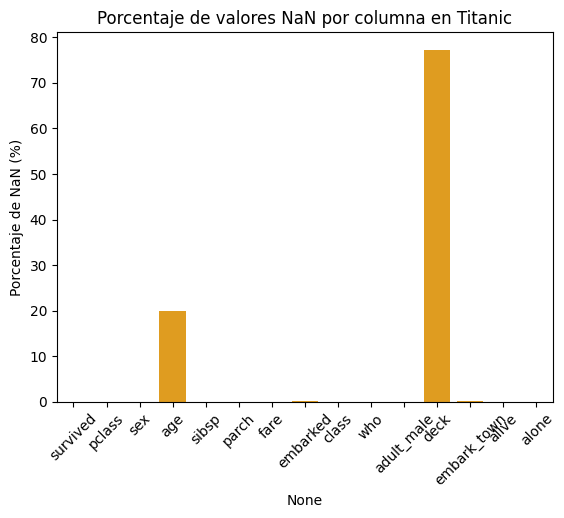

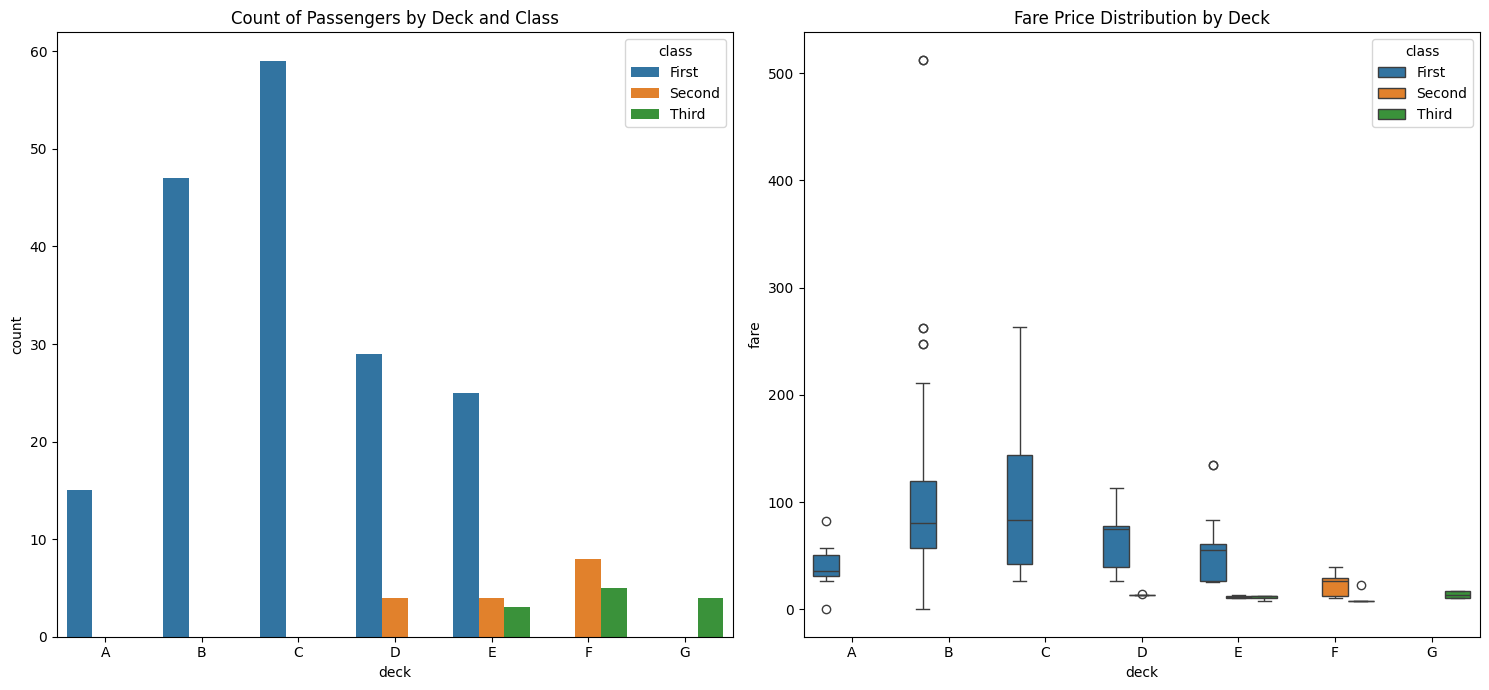

In [234]:
nan_percent = df_titanic.isna().mean() * 100
sns.barplot(x=nan_percent.index, y=nan_percent.values, color='orange')
plt.ylabel('Porcentaje de NaN (%)')
plt.xticks(rotation=45)
plt.title('Porcentaje de valores NaN por columna en Titanic')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.countplot(data=df_titanic, x='deck', hue='class', ax=axes[0])
axes[0].set_title("Count of Passengers by Deck and Class")

sns.boxplot(data=df_titanic, x='deck', y='fare', hue='class', ax=axes[1])
axes[1].set_title("Fare Price Distribution by Deck")

plt.tight_layout()
plt.show()


In [235]:
# Fill missing 'age' values using mean value
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

# Ignore the 'deck' variable
if 'deck' in df_titanic.columns:
    df_titanic.drop(columns=['deck'], inplace=True)

# Discard entries with NaN in 'embarked'
df_titanic = df_titanic[df_titanic['embarked'].notna()]

# Discard entries with NaN in 'embark_town'
df_titanic = df_titanic[df_titanic['embark_town'].notna()]


# Fill missing 'deck' values using mean deck value per entry class and fare group
###############
# No funciona #
###############

# First, create a fare group (e.g., quartiles)
# df_titanic['fare_group'] = pd.qcut(df_titanic['fare'], q=4, labels=False)

# # Map deck letters to numbers for mean calculation
# deck_map = {deck: i for i, deck in enumerate(sorted(df_titanic['deck'].dropna().unique()))}
# df_titanic['deck_num'] = df_titanic['deck'].map(deck_map).astype(float)  # Ensure numeric type

# # Compute mean deck_num per class and fare_group
# mean_deck = df_titanic.groupby(['pclass', 'fare_group'])['deck_num'].mean()
# display(mean_deck)

# # Fill missing deck_num with group mean
# for c in range(1,4):
#     for q in range(4):
#         mask = (df_titanic['deck_num']==c) & (df_titanic['fare_group']==q)
#         mean = mean_deck.get((c, q))
#         print(mean)
#         if(not pd.isna(mean)):
#             df_titanic['deck_filled'] = df_titanic['deck_num'].mask(mask, df_titanic['deck_num']).fillna(mean)
#     #df_titanic['deck_filled'] = df_titanic['deck_num'].fillna(mean_deck)

# # Map back deck_filled to letters
# reverse_deck_map = {v: k for k, v in deck_map.items()}
# deck_letter_map = {v: k for k, v in reverse_deck_map.items()}
# df_titanic['deck_filled'] = df_titanic['deck_filled'].round().map(reverse_deck_map)

# sns.boxplot(data=df_titanic, x='deck_filled', y='fare', hue='class')
# plt.tight_layout()
# plt.show()
# display(df_titanic.head(20))


C:\Users\santi\AppData\Local\Temp\ipykernel_26448\432976077.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# pre-selección de variables útiles


In [236]:
# Check if 'survived' and 'alive' contain the same information in df_titanic
comparison = (df_titanic['survived'] == (df_titanic['alive'] == 'yes')).all()
print(f"'survived' and 'alive' contain the same information: {comparison}")

# check if 'embarked' always is the first letter of 'embark_town'
embarked_matches = (df_titanic['embarked'] == df_titanic['embark_town'].str[0])
all_match = embarked_matches | df_titanic['embarked'].isna() | df_titanic['embark_town'].isna()
print(f"'embarked' is always the first letter of 'embark_town': {all_match.all()}")


'survived' and 'alive' contain the same information: True
'embarked' is always the first letter of 'embark_town': True


Podemos sacar la columna 'alive' ya que no aporta nueva información.
Ademas podemos sacar la columna 'embarked' ya que no aporta nueva información.

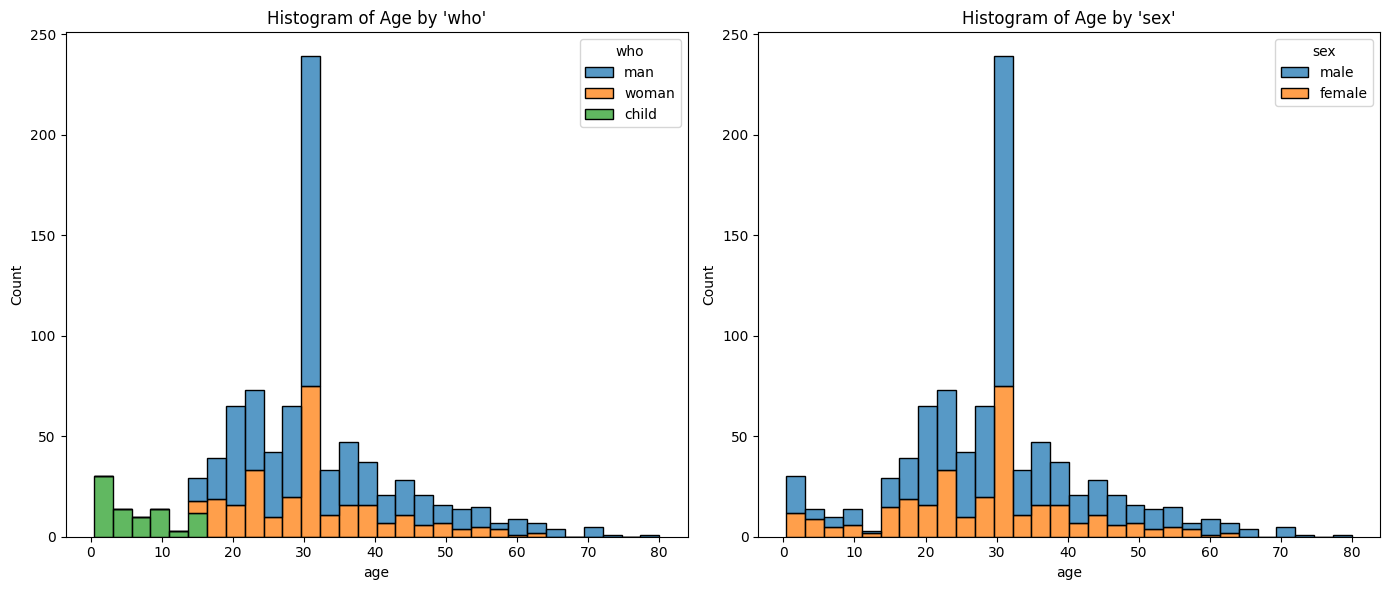

In [237]:
# Histogram of 'age' separated by 'who' and 'sex'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df_titanic, x='age', hue='who', multiple='stack', kde=False, ax=axes[0])
axes[0].set_title("Histogram of Age by 'who'")

sns.histplot(data=df_titanic, x='age', hue='sex', multiple='stack', kde=False, ax=axes[1])
axes[1].set_title("Histogram of Age by 'sex'")

plt.tight_layout()
plt.show()

Vemos que la variable 'Who' es una combinacion de las variables 'age' y 'sex'. Solo que para los menores de determinada edad en vez de hombre y mujer se los categoriza como niños. La podemos sacar ya que no aporta nueva informacion. 

In [238]:
# Ignore the variables 

for col in ['alive', 'embarked', 'who','class','adult_male']:
    if col in df_titanic.columns:
        df_titanic.drop(columns=[col], inplace=True)


# Variables Categoricas
Las variables categoricas las transformo en numericas para poder observarlas mejor

In [239]:
from sklearn.preprocessing import LabelEncoder

# Map text/categorical variables to numerical in df_titanic
# Apply LabelEncoder to each text column
for col in ['sex', 'embark_town', 'alone']:
    le = LabelEncoder()
    df_titanic[col] = le.fit_transform(df_titanic[col])

# Normalizacion
Como la edad y el precio del ticket estan en otra escala que dificulta su visualizacion las normalizo mediante min-max de 0 a 3 ya que el resto de los datos esta mas o menos en esa escala.

In [240]:
# Normalización min-max para 'age' y 'fare'
for col in ['age', 'fare']:
    min_val = df_titanic[col].min()
    max_val = df_titanic[col].max()
    df_titanic[col] = 3 * (df_titanic[col] - min_val) / (max_val - min_val)

# Visualizacion general de los datos

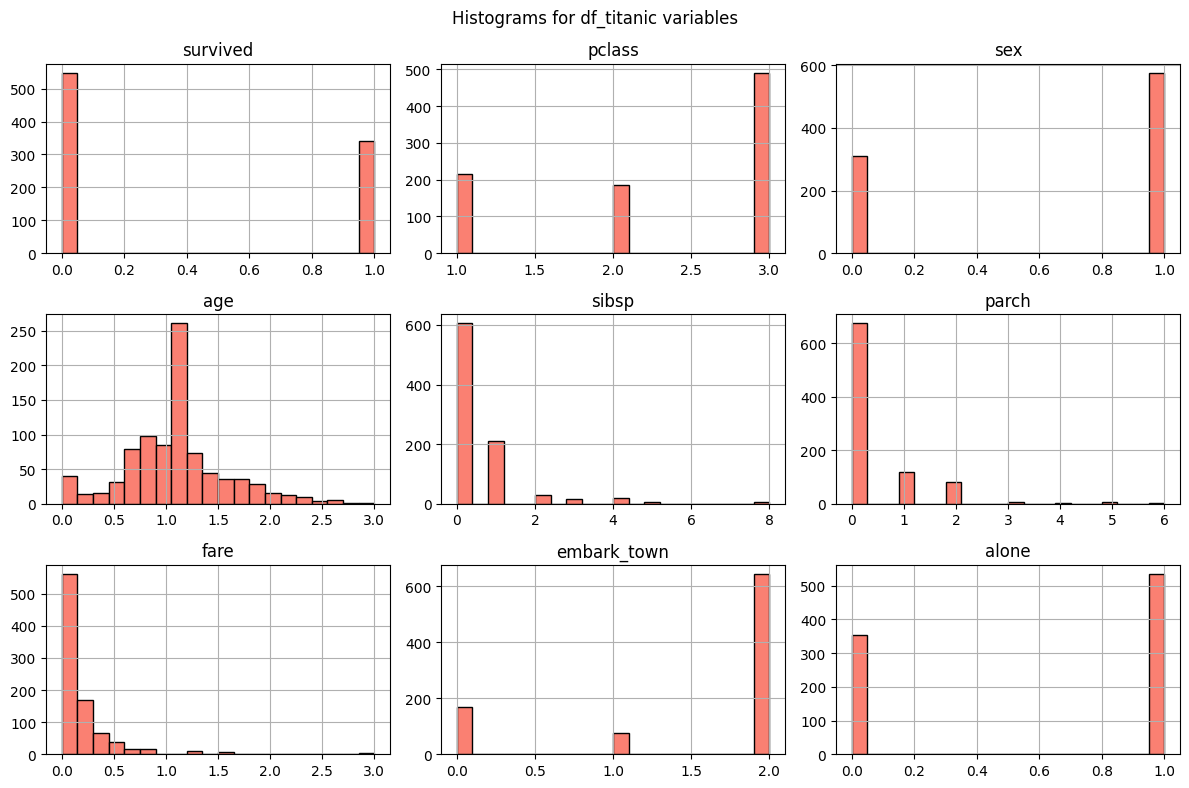

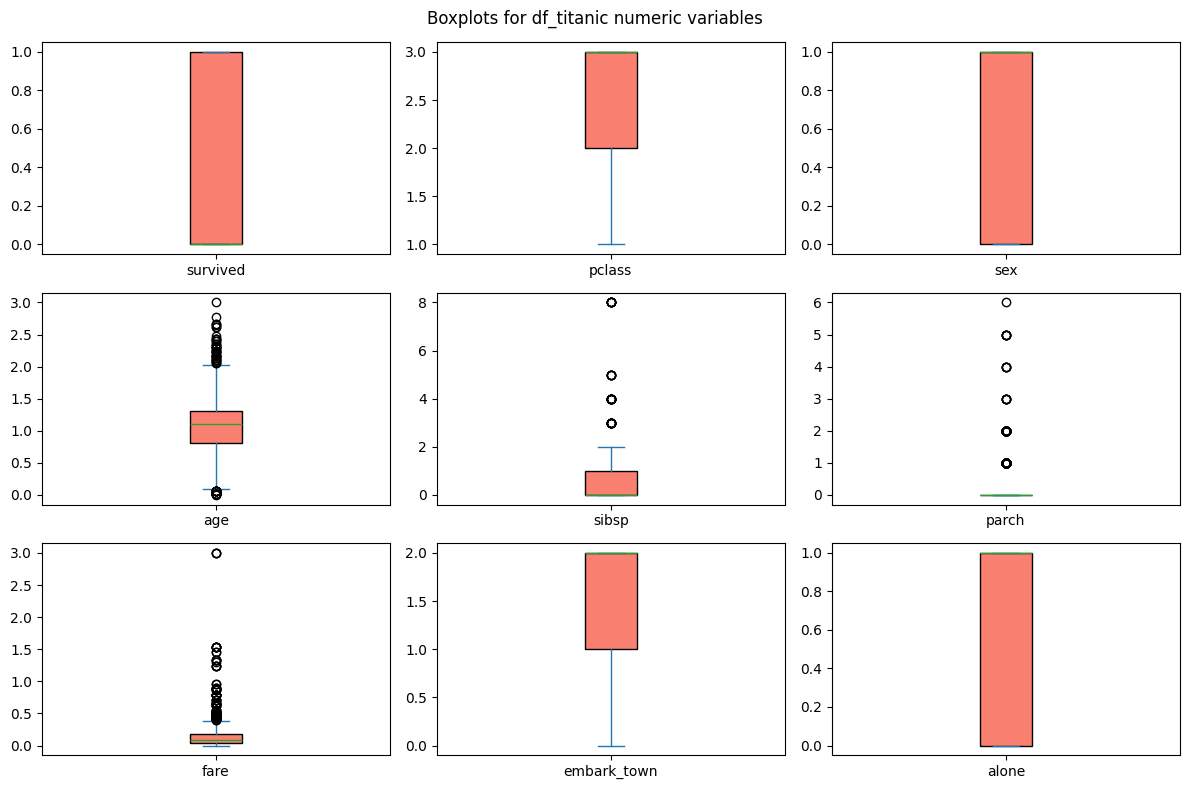

In [241]:
# Visualizamos los datos limpios

# Histograms for df_titanic
df_titanic.hist(bins=20, figsize=(12, 8), color='salmon', edgecolor='black')
plt.suptitle('Histograms for df_titanic variables')
plt.tight_layout()
plt.show()

# Boxplots for df_titanic (only numeric columns)
numeric_cols = df_titanic.select_dtypes(include=np.number).columns
df_titanic[numeric_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8), patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.suptitle('Boxplots for df_titanic numeric variables')
plt.tight_layout()
plt.show()



## Ejercicio 3a: Biplots

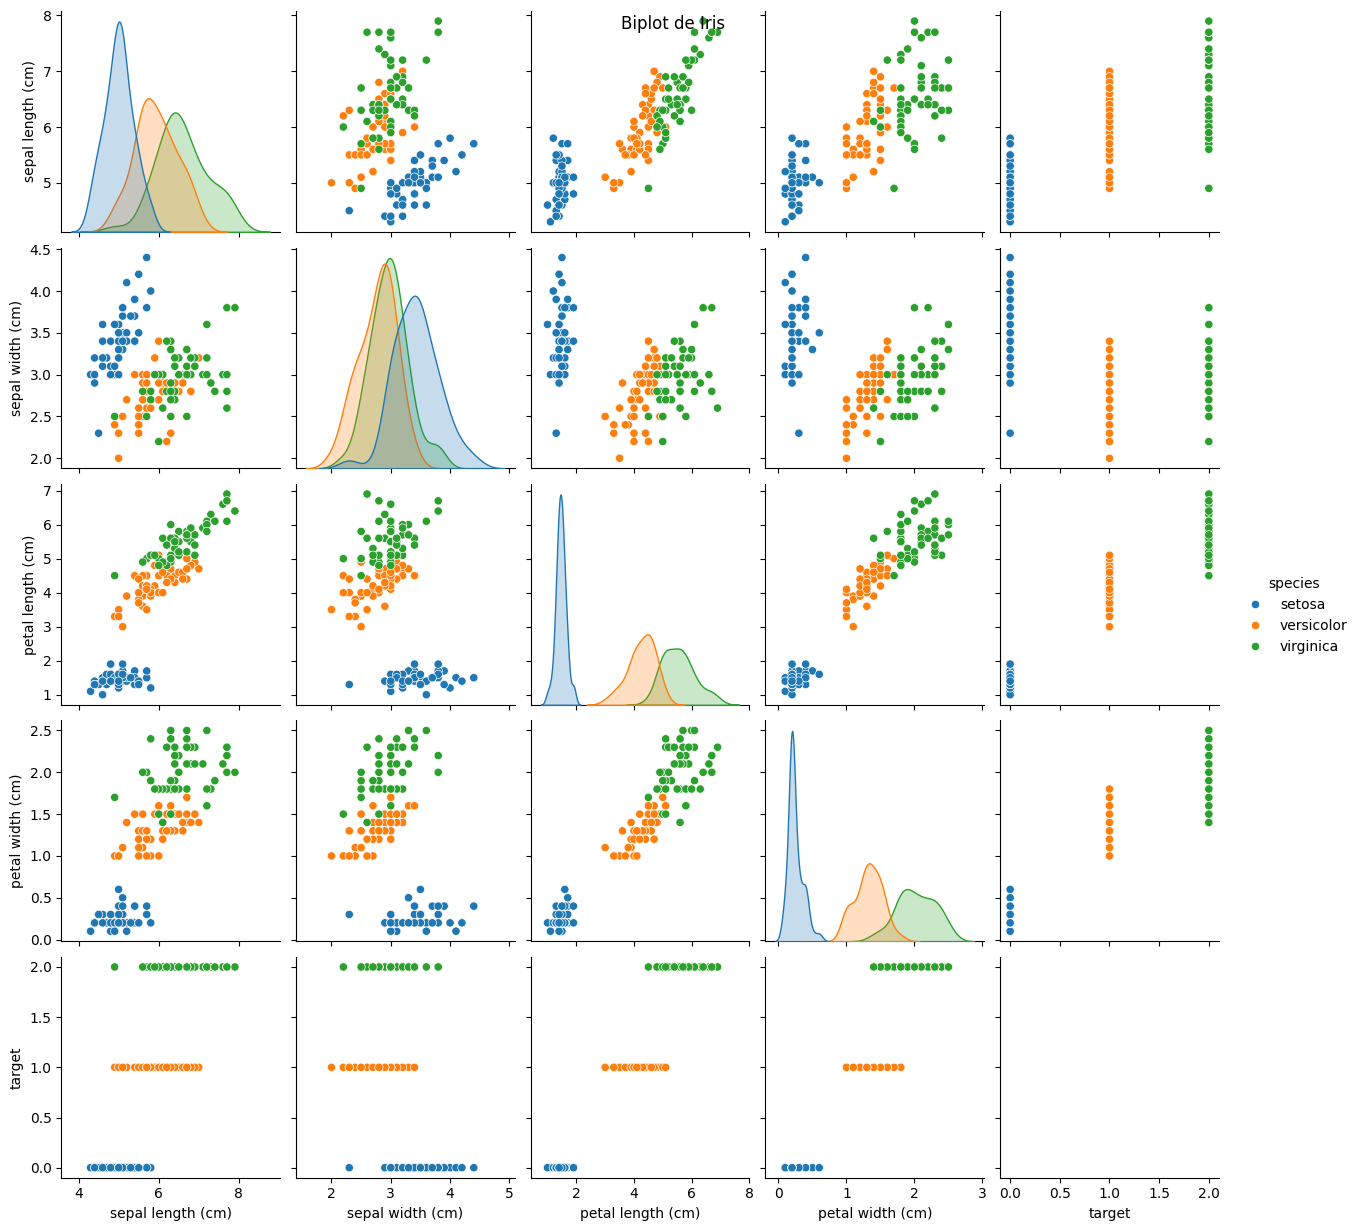

In [242]:
# construimos el biplot (pairplot en seaborn)
sns.pairplot(df_iris, hue="species", diag_kind="kde")


# graficamos
plt.suptitle("Biplot de Iris")
plt.show()

Se ven claramente varios patrones en algunas combinaciones de las variables. 

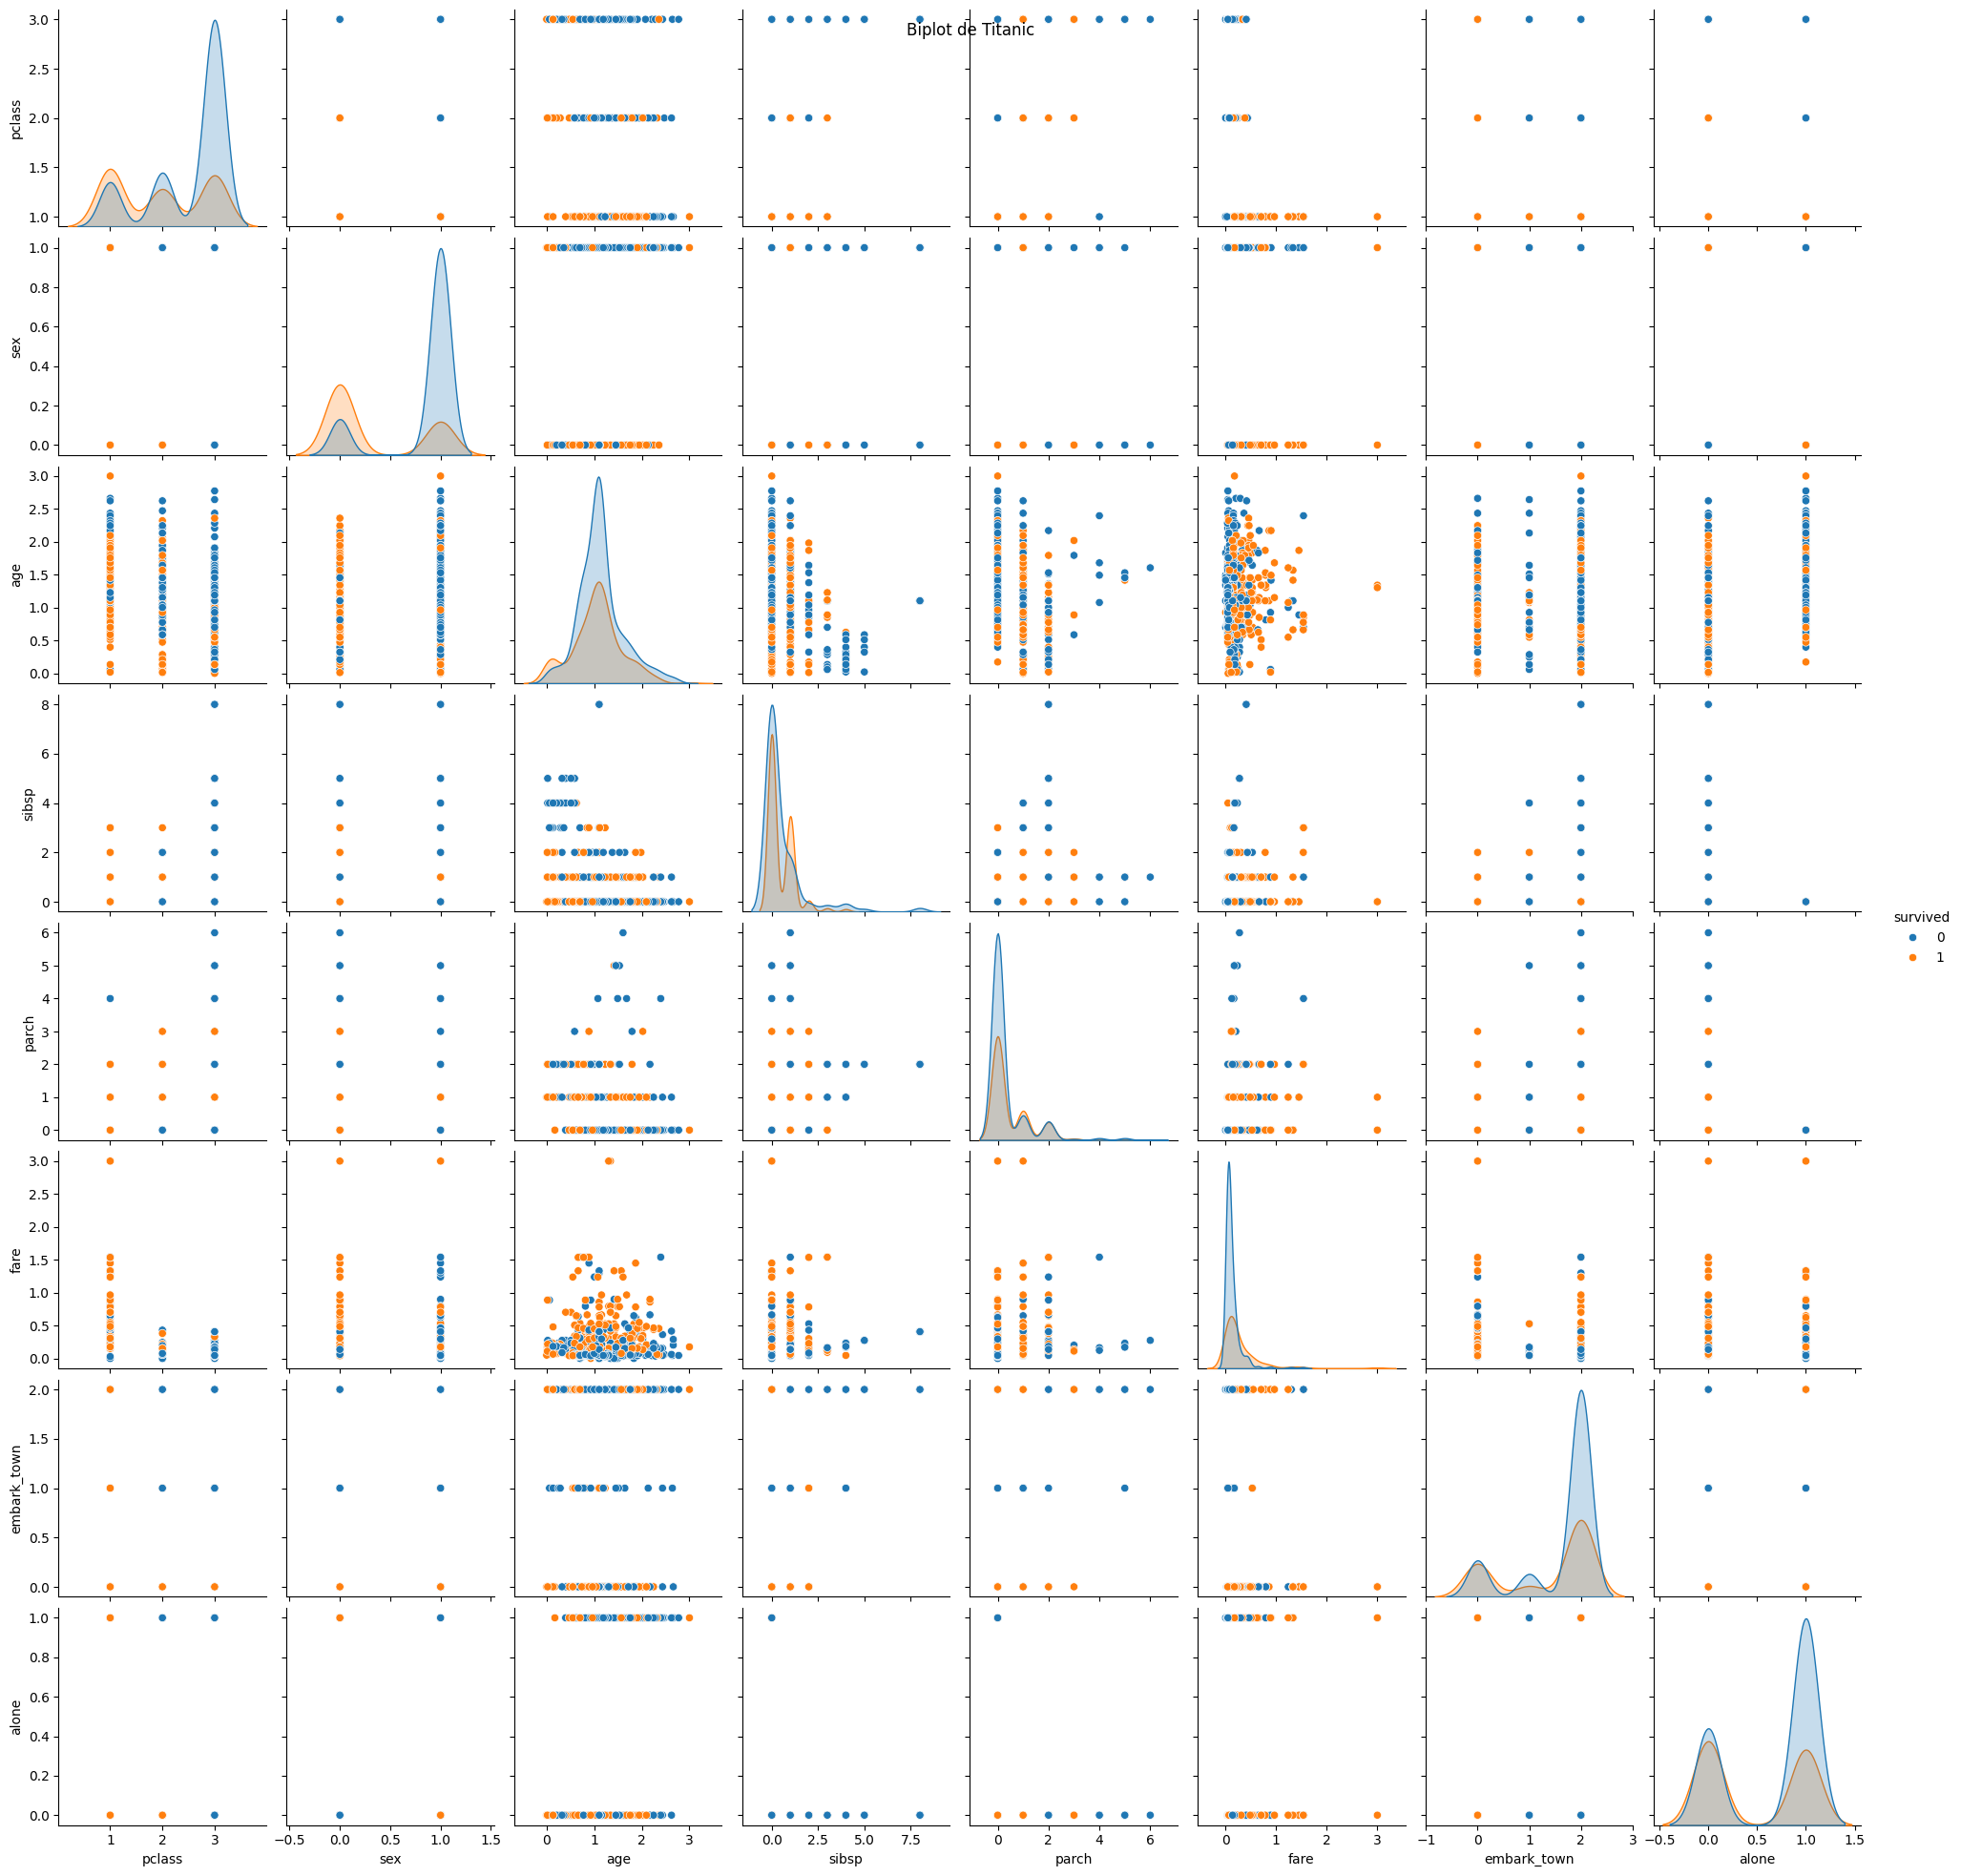

In [243]:
# construimos el biplot (pairplot en seaborn)
sns.pairplot(df_titanic, hue="survived", diag_kind="kde")

# graficamos
plt.suptitle("Biplot de Titanic")
plt.show()

Pese a que la cantidad de variables ya complica su visualizacion, se pueden ver claramente como ciertas combinaciones determinan bien el target, por ejemplo entre vemos que entre clase y fare se particiona bien, vemos que solo el sexo particiona bien.

# Ejercicio 3b: Coordenadas Paralelas

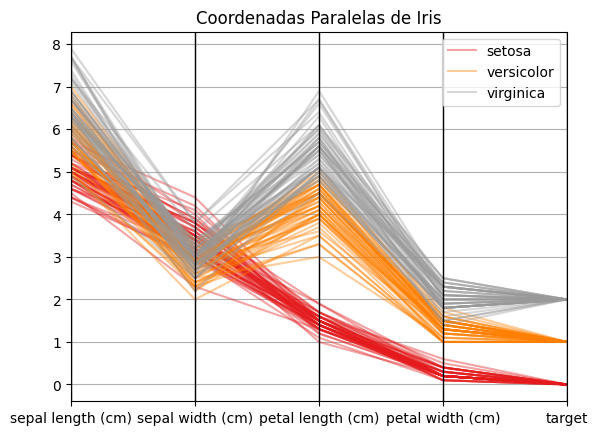

In [244]:
parallel_coordinates( df_iris, 'species', colormap=plt.get_cmap("Set1"), alpha=0.4)

# graficamos
plt.title("Coordenadas Paralelas de Iris")
plt.show()

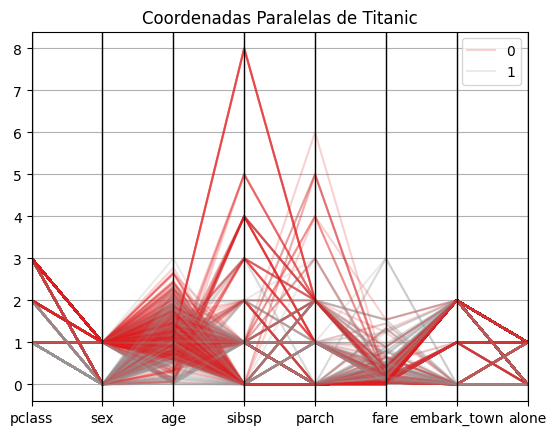

In [245]:
parallel_coordinates(df_titanic, 'survived', colormap=plt.get_cmap("Set1"), alpha=0.2)

# graficamos
plt.title("Coordenadas Paralelas de Titanic")
plt.show()

# Ejercicio 3c: Star Plots

In [249]:
# Calculate mean values for each class in iris
iris_means = iris.frame.groupby('species')[iris.feature_names].mean()

# Prepare data for plotly Scatterpolar
fig = ply.graph_objects.Figure()

for species, row in iris_means.iterrows():
    # Close the line by repeating the first value at the end
    r_closed = np.append(row.values, row.values[0])
    fig.add_trace(
        ply.graph_objects.Scatterpolar(
            r=r_closed,
            theta=theta_closed,
            name=species,
            marker=dict(line=dict(color='black')),
            opacity=0.8,
            showlegend=True,
            fill='toself'  # Fill the area under the star
        )
    )
    theta_closed = iris.feature_names + [iris.feature_names[0]]

fig.update_layout(
    title="Iris Class Means - Scatterpolar Plot",
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True
)

fig.show()

In [250]:
# Selecciona las columnas numéricas relevantes
cols = ['age', 'fare' , 'sex', 'alone', 'pclass']

# Calcula la media de cada columna
titanic_means = df_titanic.groupby('survived')[cols].mean()
# Cierra el gráfico repitiendo el primer valor al final
#r_closed = np.append(means.values, means.values[0])
theta_closed = cols + [cols[0]]



fig = ply.graph_objects.Figure()
for survived, row in titanic_means.iterrows():
    # Close the line by repeating the first value at the end
    nombre = 'Survived' if survived == 1 else 'Did Not Survive'
    r_closed = np.append(row.values, row.values[0])
    fig.add_trace(
        ply.graph_objects.Scatterpolar(
            r=r_closed,
            theta=theta_closed,
            name=nombre,
            marker=dict(line=dict(color='black')),
            opacity=0.8,
            showlegend=True,
            fill='toself'  # Fill the area under the star
        )
    )

fig.update_layout(
    title="Titanic Means - Starplot",
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True
)

fig.show()

Se puede ver claramente como sobrevivieron mas probablemente los de clase mas alta que eran mas jovenes, pagaron mas y por sobretodo las mujeres

# Ejercicio 3d: Chernoffs Faces

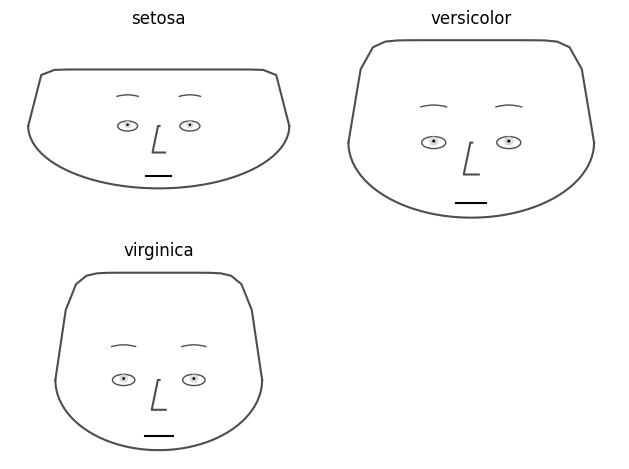

In [251]:
iris_means = df_iris.groupby('species')[iris.feature_names].mean()

fig = chernoff_face(data=iris_means.values, titles=iris_means.index.tolist())

# Display
fig.tight_layout()
plt.show()

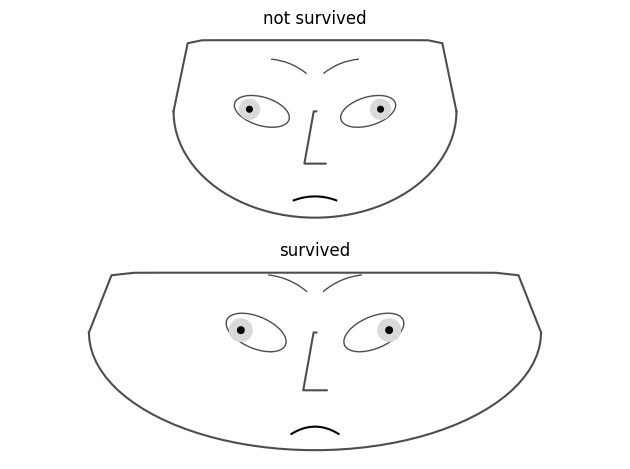

In [252]:

# Calcula la media de cada columna
titanic_means = df_titanic.groupby('survived')[df_titanic.columns].mean()
mapping = {0: "not survived", 1: "survived"}
mapped = [mapping[x] for x in titanic_means.index.tolist()]
fig = chernoff_face(data=titanic_means.values, titles=mapped)

# Display
fig.tight_layout()
plt.show()

# Preguntas
### ¿Qué dimensiones piensa que separan mejor los datos para cada uno? 
Se pudo observar en el parallel plot y en el pairplot que petal width y petal length separan bien los datos de iris.
Para el dataset de titanic se ven tres variables que separan bien, edad, clase y sexo. Las combinaciones de estas se pueden ver en el pair plot pero para tener una idea de como funcionan juntas se puede intuir en el parallel plot.

### ¿Se pueden ver fácilmente outliers con algún método? 
Outliers de una variable se pueden ver en los boxplot como el pasajero con un ticket de 500 pero outliers conciderando todas las variables no se pueden ver facilmente con ninguno de estos metodos.

